# Data Exploration

## History 
Some reminder on the Titanic story:  
**Date**: 15 April 1912.  
**Hit time**: 11:40 pm.    
**deckplans** : https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html  
**lifeboats**: because it was considered unsinkable, the Titanic didn't have enough lifeboats for all passengers. They where primarily intended to tranfer passenger to nearby rescue vessels. There were enough lifeboates to carry only half of the passengers on board at the time.  
**women and children first**: the "women and children first" protocol was generally followed which resulted in adult male to have a lower rate of survival. Moreover, in some parts of the boat when no women or children were ready to board a lifeboat, it would be released with empty seats, while in other parts, men were allowed to board lifeboats if seats were available and no woman or child were there.  


## Dataset  
**survival**: Survival (0 = No; 1 = Yes)  
**pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
**name**: Name  
**sex**: Sex  
**age**: Age  
**sibsp**: Number of Siblings/Spouses Aboard  
**parch**: Number of Parents/Children Aboard  
**ticket**: Ticket Number  
**fare**: Passenger Fare  
**cabin**: Cabin  
**embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Hypothesis
- Social status may have played an important role in 1912. We can expect people with higher status to be given priority when boarding lifeboats. This information can be deducted from class, title, fare and cabin.  
- At that time, nationality and ethnicity could also have had an influence. The information is not available in the dataset. The name might give some hints.  
- The ship hit the iceberg at 11:40 pm. At this time, we can expect that most passengers were in their cabin. Location may have had an influence.
- The women and children first protocol was followed therefore gender and age will also help determine survival rate.  
- Family members would help each others. We'll look at the influence of family size.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv')

In [3]:
train.shape

(891, 12)

In [5]:
train.describe()

/home/guillaume/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
def feature_chart(dataframe, count, group):
	df = dataframe.groupby([count, group])[group].count().unstack(count)
	df.fillna(0, inplace=True)
	df['PercentSurvived'] = (df[1] / (df[0] + df[1])) * 100
	print(df)

	df[[0,1]].plot(kind='bar', stacked=True) 

## Pclass
The class is an indicator of social status. In 1912, we can expect that people with higher social status were given priority when boarding lifeboats. Moreover, looking at the deckplans, we can see that third class cabins where deeper in the ship. They were submerged earlier than the second and first class.

Survived    0    1  PercentSurvived
Pclass                             
1          80  136        62.962963
2          97   87        47.282609
3         372  119        24.236253


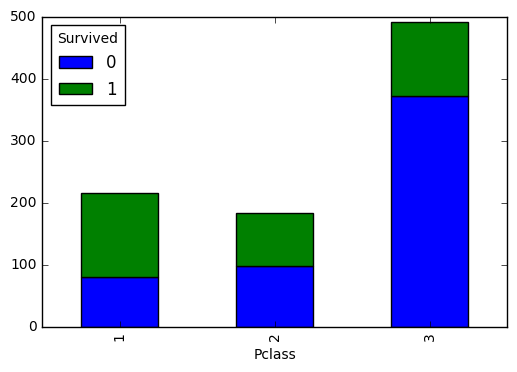

In [10]:
feature_chart(train,'Survived','Pclass')

There is a clear decrease of the survival rate in the second and third classes compared to the first one. This can be explained by people with higher social status given priority when boarding lifeboats or second and third class cabins behing in lower decks.  
However there can be other factors like gender distribution:

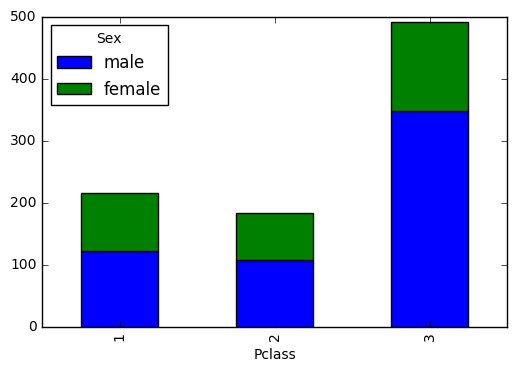

In [15]:
Sex_Pclass = train.groupby(['Sex','Pclass'])['Pclass'].count().unstack('Sex')
Sex_Pclass[['male','female']].plot(kind='bar', stacked=True)

Here, we can see that there are more men in third class. This could also explain the lower survival rate. In this case, the survival is affected by the Sex, and not Class.

## Name
The name variable contains a title that can gives an indication of social status and therefore of chance of survival. The last name can also hide some useful information but I'll skip it for now.

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/guillaume/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Survived      0      1  PercentSurvived
Title                                  
Lady        0.0    2.0       100.000000
Master     17.0   23.0        57.500000
Miss       55.0  130.0        70.270270
Mr        436.0   81.0        15.667311
Mrs        26.0  100.0        79.365079
Rev         6.0    0.0         0.000000
Sir         9.0    6.0        40.000000


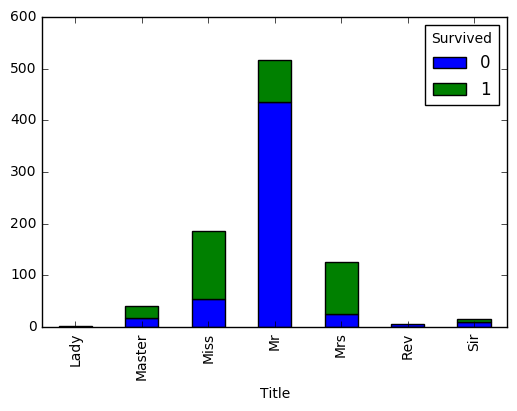

In [14]:
df_title = train[['Survived','Name']]
df_title['Title'] = df_title['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])

#df_title['Title'][df_title.Title.isin(['Mlle','Ms'])] = 'Miss'
#df_title['Title'][df_title.Title == 'Mme'] = 'Mrs'
#df_title['Title'][df_title.Title.isin(['Jonkheer','Don','Dr','Capt','Col','Major'])] = 'Sir'
#df_title['Title'][df_title.Title.isin(['the Countess','Dona'])] = 'Lady'

df_title.loc[df_title.Title.isin(['Mlle','Ms']), 'Title'] = 'Miss'
df_title.loc[df_title.Title == 'Mme', 'Title'] = 'Mrs'
df_title.loc[df_title.Title.isin(['Jonkheer','Don','Dr','Capt','Col','Major']), 'Title'] = 'Sir'
df_title.loc[df_title.Title.isin(['the Countess','Dona']), 'Title'] = 'Lady'

feature_chart(df_title,'Survived','Title')

*Master* is a title that seems to be given to male children, which explains why the survival rate is higher. Other titles are highly correlated with gender. However, 'Sir' has a 40% survival rate while 'Mr'is only at 16%.   

## Sex
We can expect women to have a higher survival rate.

Survived    0    1  PercentSurvived
Sex                                
female     81  233        74.203822
male      468  109        18.890815


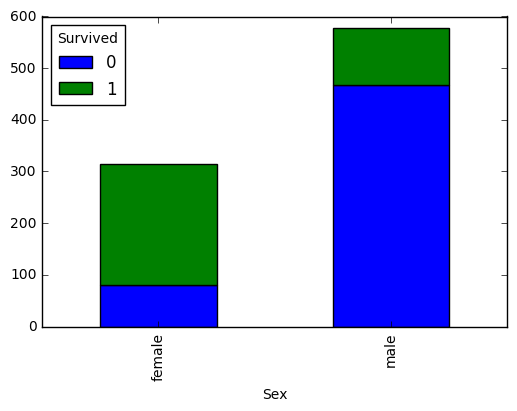

In [9]:
feature_chart(train,'Survived','Sex')

## Age

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Survived      0     1  PercentSurvived
AgeBins                               
(0, 15]    34.0  49.0        59.036145
(15, 25]  143.0  75.0        34.403670
(25, 35]  113.0  83.0        42.346939
(35, 45]   69.0  45.0        39.473684
(45, 55]   37.0  26.0        41.269841
(55, 65]   21.0  11.0        34.375000
(65, 75]    7.0   0.0         0.000000
(75, 85]    0.0   1.0       100.000000


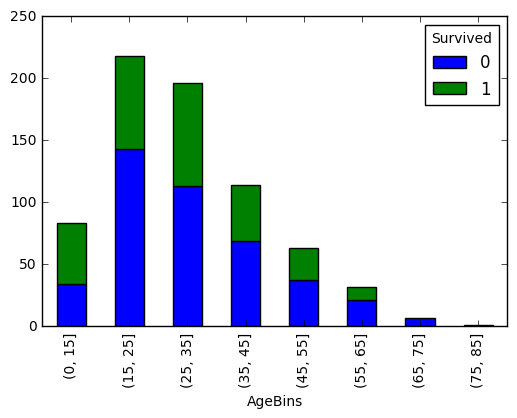

In [10]:
df_age = train[['Survived','Age']]
bins = [0,15,25,35,45,55,65,75,85]
#df_age['AgeBins'] = pd.cut(df_age['Age'], bins)
 
feature_chart(df_age,'Survived','AgeBins')

The first bin goes from 0 to 15 years to include all passengers considered as children. We can also split ages into *child* and *adult* categories:

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Survived      0    1  PercentSurvived
ChildAdult                           
adult       391  245        38.522013
child        33   45        57.692308
unknown     125   52        29.378531


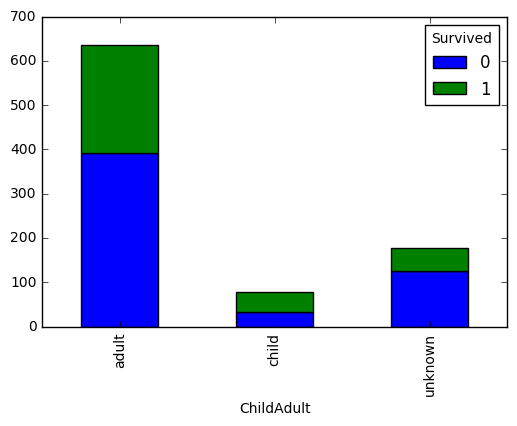

In [19]:
def child_adult(row):
    if row['Age'] < 15:
        return 'child'
    if row['Age'] >= 15:
        return 'adult'
    return 'unknown'

df_childadult = train[['Survived','Age']]
df_childadult['ChildAdult'] = df_childadult.apply(child_adult, axis=1)

feature_chart(df_childadult,'Survived','ChildAdult')

The difference in survival rate is clear. Using those bins in the model might be better than using the age.

## Family

Survived      0      1  PercentSurvived
SibSp                                  
0         398.0  210.0        34.539474
1          97.0  112.0        53.588517
2          15.0   13.0        46.428571
3          12.0    4.0        25.000000
4          15.0    3.0        16.666667
5           5.0    0.0         0.000000
8           7.0    0.0         0.000000


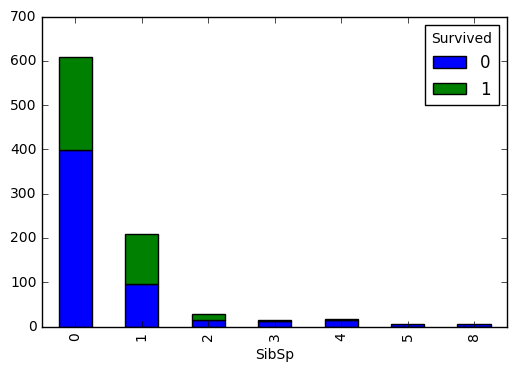

In [11]:
feature_chart(train,'Survived','SibSp')

Survived      0      1  PercentSurvived
Parch                                  
0         445.0  233.0        34.365782
1          53.0   65.0        55.084746
2          40.0   40.0        50.000000
3           2.0    3.0        60.000000
4           4.0    0.0         0.000000
5           4.0    1.0        20.000000
6           1.0    0.0         0.000000


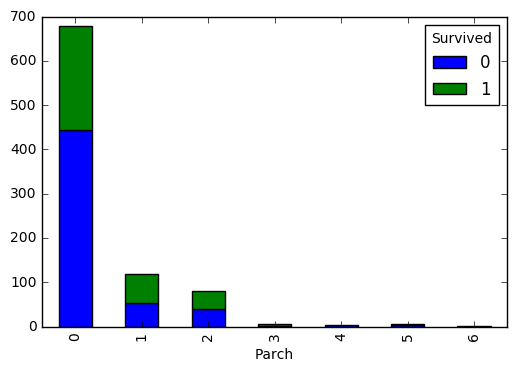

In [17]:
feature_chart(train,'Survived','Parch')

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Survived        0      1  PercentSurvived
FamilySize                               
0           374.0  163.0        30.353818
1            72.0   89.0        55.279503
2            43.0   59.0        57.843137
3             8.0   21.0        72.413793
4            12.0    3.0        20.000000
5            19.0    3.0        13.636364
6             8.0    4.0        33.333333
7             6.0    0.0         0.000000
10            7.0    0.0         0.000000


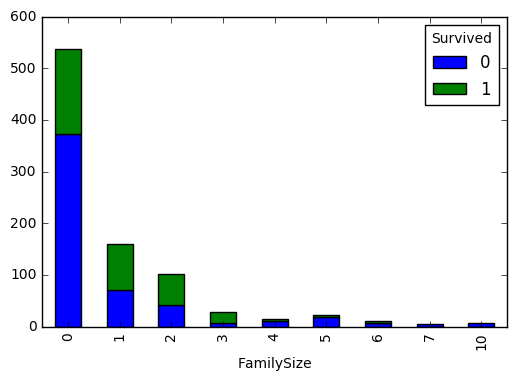

In [16]:
df_family = train[['Survived','SibSp','Parch']]
df_family['FamilySize'] = df_family['SibSp'] + df_family['Parch']
feature_chart(df_family, 'Survived', 'FamilySize')

Having relatives also seem to have an effect on survival rate. We can assume that members of a family will help each others. For families larger than 3, the positive effect of size seems to fade.

## Embarked

Survived    0    1  PercentSurvived
Embarked                           
C          75   93        55.357143
Q          47   30        38.961039
S         427  217        33.695652


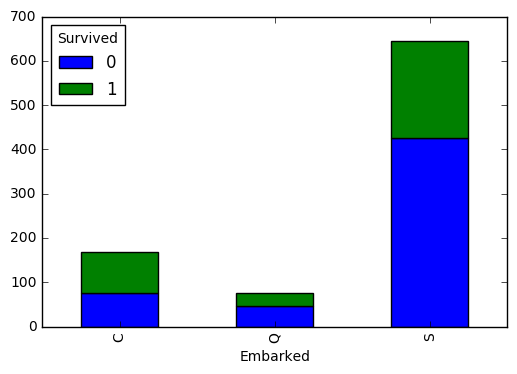

In [18]:
feature_chart(train,'Survived','Embarked')

Passengers from Cherbourg have a higher survival rate. 

## Cabin
The disaster happened late at night. We can assume that most passengers already went back to their cabin. The localisation of people should have an influence on their survival chances.

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Survived      0      1  PercentSurvived
Deck                                   
A           8.0    7.0        46.666667
B          12.0   35.0        74.468085
C          24.0   35.0        59.322034
D           8.0   25.0        75.757576
E           8.0   24.0        75.000000
F           5.0    8.0        61.538462
G           2.0    2.0        50.000000
T           1.0    0.0         0.000000
n         481.0  206.0        29.985444


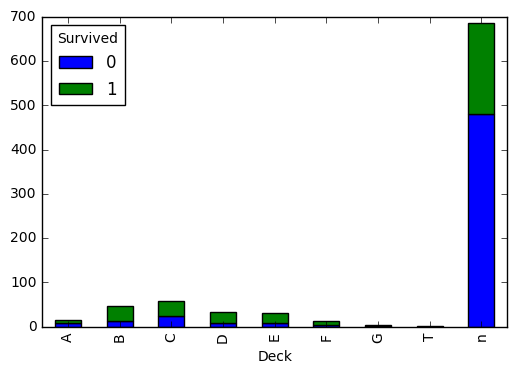

In [26]:
df_cabin = train[['Survived','Cabin']]
df_cabin['Deck'] = df_cabin['Cabin'].astype(str).str[0]
feature_chart(df_cabin,'Survived','Deck')

## Fare

/home/guillaume/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Survived      0   1  PercentSurvived
FareBins                            
(0, 10]     255  66        20.560748
(10, 20]    103  76        42.458101
(20, 30]     79  63        44.366197
(30, 40]     35  23        39.655172
(40, 50]     12   4        25.000000
(50, 100]    37  70        65.420561
(100, 550]   14  39        73.584906


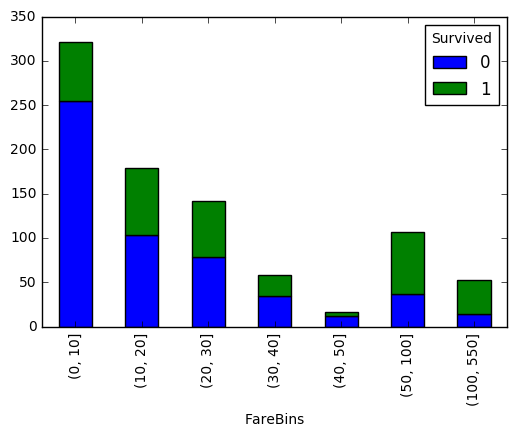

In [36]:
df_fare = train[['Survived','Fare']]
bins = [0,10,20,30,40,50,100,550]
df_fare['FareBins'] = pd.cut(df_fare['Fare'], bins)
feature_chart(df_fare,'Survived','FareBins')

Higher fares have a better survival rate. As we saw before, first class passengers where more likely to survive. The fare could also be linked to the passenger's cabin and can therefore gives some extra information on the passenger's localization at the time of the disaster.